# データセット取得（Sarah Gets a Diamond）
Sarah Gets a Diamond

以下のようなデータが含まれます。

このサンプルではPrice(ダイアモンドの価格)を推定するモデルを作成。
* ID：各データのID
* Carat Weight：ダイヤモンドの重量<br>※1カラットは0.2グラムに相当
* Cut：ダイヤモンドカット<br>Signature-Ideal, Ideal, Very Good, Good, Fair
* Color：ダイヤモンドカラー ※データセットではDが一番良く、Iが一番悪い<br>D > E > F-無色 > G > H > I-ほぼ無色
* Clarity：ダイヤモンド透明度<br>F(Flawless) > IF(Internally Flawless) > VVS1 or VVS2(Very, Very Slightly Included) > VS1 or VS2(Very Slightly Included) > SI1(Slightly Included)
* Polish：研磨によるダイヤモンドの光沢<br>ID(理想的) > EX(優れた) > VG(非常に良い) > G(良い)
* Symmetry：ダイヤモンドの対称性<br>ID(理想的) > EX(優れた) > VG(非常に良い) > G(良い)
* Report：どのグレーディングエージェンシーがダイヤモンド品質を報告したか<br>「AGSL」または「GIA」
* Price：ダイヤモンドの評価額(米ドル)

In [1]:
# PyCaretチュートリアル用データセット取得
# 詳細は<https://pycaret.org/get-data/>を参照
from pycaret.datasets import get_data

dataset = get_data('diamond')
dataset.to_csv('./dataset.csv')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [3]:
# 学習データ/テストデータ分割
train_data = dataset.sample(frac=0.9, random_state=42).reset_index(drop=True)
test_data = dataset.drop(train_data.index).reset_index(drop=True)

print('データ      ：' + str(dataset.shape) + ' ' + str(dataset.index))
print('学習データ  ：' + str(train_data.shape) + ' ' + str(train_data.index))
print('テストデータ：' + str(test_data.shape) + ' ' + str(test_data.index))

データ      ：(6000, 8) RangeIndex(start=0, stop=6000, step=1)
学習データ  ：(5400, 8) RangeIndex(start=0, stop=5400, step=1)
テストデータ：(600, 8) RangeIndex(start=0, stop=600, step=1)


# PyCaretでのデータセットアップ

In [4]:
# 回帰分析用インポート
from pycaret.regression import *

In [5]:
# 目的変数を'Price'に指定しデータのセットアップを実施
# session_idを指定することで欄数シードを固定
# セットアップが完了するとデータの情報や前処理のパイプラインの情報が表示される
# 詳細は<https://pycaret.org/setup/>を参照
# 
# また、欠損値の補間等の前処理もsetup()実施時に可能
# 前処理の詳細は<https://pycaret.org/preprocessing/>を参照
exp = setup(data=train_data, target='Price', session_id=42) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
print(exp)

(      Carat Weight  Cut_Fair  Cut_Good  Cut_Ideal  Cut_Signature-Ideal  \
0             1.58       0.0       0.0        1.0                  0.0   
1             1.63       0.0       0.0        1.0                  0.0   
2             1.33       0.0       0.0        1.0                  0.0   
3             1.06       0.0       0.0        0.0                  0.0   
4             1.01       0.0       0.0        0.0                  0.0   
...            ...       ...       ...        ...                  ...   
5395          1.00       0.0       0.0        1.0                  0.0   
5396          1.52       0.0       0.0        1.0                  0.0   
5397          2.70       0.0       0.0        1.0                  0.0   
5398          2.01       0.0       0.0        1.0                  0.0   
5399          1.24       0.0       0.0        1.0                  0.0   

      Cut_Very Good  Color_D  Color_E  Color_F  Color_G  ...  Clarity_VVS2  \
0               0.0      0.0    

# モデル比較

In [7]:
# Pycaretのサポートする全てのモデルを実行しパフォーマンスを比較する
# デフォルトではR2でソートされるが、引数を指定することで変更可能 例：compare_models(sort='RMSLE')
# 交差検証数のデフォルトは10だが、引数を指定することで変更可能 例：compare_models(fold = 5)で5分割交差検証
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,625.802800,1934502.482500,1336.388700,0.981600,0.068900,0.050500
1,Extra Trees Regressor,748.499700,2428664.462100,1519.334900,0.976300,0.080400,0.059300
2,Random Forest,757.328700,2870365.024300,1648.920500,0.972400,0.080800,0.059000
3,Light Gradient Boosting Machine,733.670100,3040644.607200,1681.781900,0.971000,0.077700,0.056500
4,Gradient Boosting Regressor,886.536100,3141465.660700,1745.811300,0.969100,0.100800,0.076100
5,Extreme Gradient Boosting,927.033400,3461267.119300,1836.767500,0.966000,0.105900,0.079800
6,Decision Tree,962.482500,3865914.303300,1921.431300,0.962500,0.103600,0.076200
7,Ridge Regression,2404.788500,14202092.268300,3714.533500,0.861200,0.672200,0.284700
8,Bayesian Ridge,2408.365400,14384111.611700,3737.064600,0.859700,0.671200,0.284800
9,Lasso Regression,2405.946800,14408058.944100,3739.811600,0.859500,0.680000,0.284200


# モデル生成
以降では、例とてLGBMでの生成を実施する

In [8]:
# 引数で作成するモデルを指定
# 指定可能はモデルの詳細は<https://pycaret.org/create-model/>を参照
lgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,676.7276,1.537459e+06,1239.9433,0.9823,0.0747,0.0564
1,697.6297,1.658129e+06,1287.6834,0.9782,0.0760,0.0573
2,680.6034,1.833539e+06,1354.0824,0.9806,0.0784,0.0572
3,677.7648,3.065129e+06,1750.7510,0.9709,0.0752,0.0537
4,717.3474,2.536458e+06,1592.6261,0.9727,0.0783,0.0565
5,735.4819,2.383288e+06,1543.7903,0.9749,0.0713,0.0550
6,928.9394,8.625292e+06,2936.8848,0.9382,0.0910,0.0596
7,747.2126,2.534094e+06,1591.8839,0.9785,0.0726,0.0547
8,764.8176,3.596917e+06,1896.5541,0.9697,0.0779,0.0558
9,710.1761,2.636139e+06,1623.6192,0.9638,0.0811,0.0584


In [9]:
print(lgbm_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# モデルチューニング
create_model()では、デフォルトのハイパーパラメーターでモデルを生成する。

tune_model()では、事前に定義されたハイパーパラメーターを自動的に調整し交差検証を実施する。

In [10]:
# tune_model()は、事前定義された検索スペースでのハイパーパラメーターをランダムグリッド検索する。
# デフォルトでは、R2を最適化するように設定されているが、引数を指定することで変更可能。
# 例：tune_model('lightgbm', optimize = 'RMSE')
# また、ランダムグリッド検索内のイテレーション回数はデフォルトで10だが、引数を指定することで変更可能。
# 例：tune_model('lightgbm', n_iter=25)
tuned_lgbm_model = tune_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,786.0718,2.457299e+06,1567.5776,0.9717,0.1027,0.0627
1,742.7385,1.818080e+06,1348.3621,0.9761,0.0952,0.0645
2,795.8156,2.091959e+06,1446.3607,0.9778,0.0933,0.0680
3,751.3239,1.987652e+06,1409.8412,0.9811,0.0840,0.0610
4,858.6616,4.078921e+06,2019.6338,0.9561,0.0926,0.0663
5,792.9876,1.880271e+06,1371.2296,0.9802,0.0932,0.0692
6,974.4924,5.580543e+06,2362.3173,0.9600,0.0954,0.0683
7,806.2960,2.597460e+06,1611.6636,0.9780,0.0918,0.0655
8,839.4617,2.924767e+06,1710.1951,0.9753,0.0963,0.0639
9,786.4922,2.596783e+06,1611.4538,0.9644,0.0950,0.0661


In [11]:
print(tuned_lgbm_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.9, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=200, n_jobs=-1, num_leaves=10, objective=None,
              random_state=42, reg_alpha=0.7, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# モデルプロット

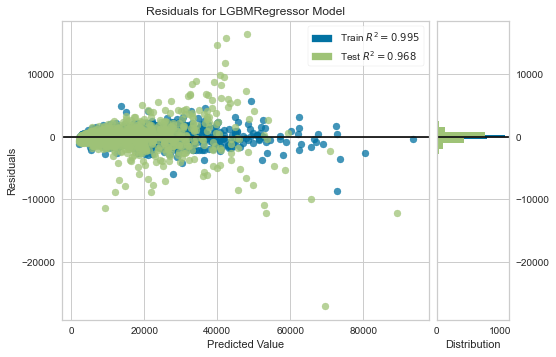

In [12]:
# 残差プロット
plot_model(estimator=tuned_lgbm_model)

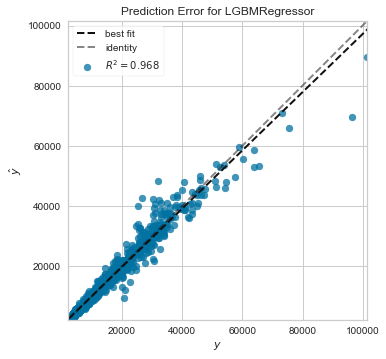

In [13]:
# 予測誤差プロット
plot_model(estimator=tuned_lgbm_model, plot='error')

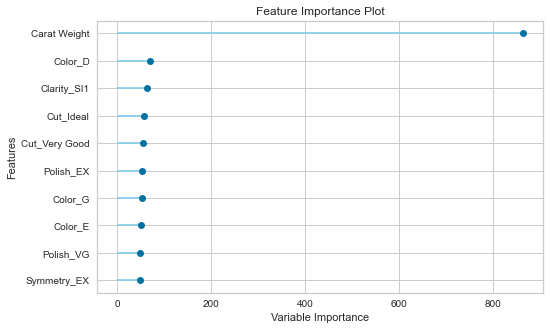

In [14]:
# 特徴重要度プロット
plot_model(estimator=tuned_lgbm_model, plot = 'feature')

In [15]:
# 可視化可能なプロット全て(選択式)
# 比較検討に便利
evaluate_model(estimator=tuned_lgbm_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 推論

In [16]:
predictions = predict_model(tuned_lgbm_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,887.3011,3.601499e+06,1897.7616,0.9679,0.0917,0.065


In [17]:
predictions = predict_model(tuned_lgbm_model, data=test_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,10103.0968
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,15920.1246
2,1.51,Good,F,SI1,VG,G,GIA,10429,10318.6414
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4558.0953
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4337.8026


# モデルのファイナライズ
テスト/ホールドアウトサンプルを含む完全なデータセットにモデルを適合させる

In [18]:
final_lgbm_model = finalize_model(tuned_lgbm_model)
print(final_lgbm_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.9, max_depth=100,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=200, n_jobs=-1, num_leaves=10, objective=None,
              random_state=42, reg_alpha=0.7, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# モデルの保存/読み込み

In [19]:
# モデル保存
save_model(final_lgbm_model, 'FinalizedLgbmRegressionModel')

Transformation Pipeline and Model Succesfully Saved


In [20]:
# モデル読み込み
load_lgbm_model = load_model('FinalizedLgbmRegressionModel')

Transformation Pipeline and Model Sucessfully Loaded


In [21]:
# ロードしたモデルでの推論
predictions = predict_model(load_lgbm_model, data=test_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,11050.5316
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,16205.2268
2,1.51,Good,F,SI1,VG,G,GIA,10429,10586.2141
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4768.7958
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4283.2613


# アンサンブル学習
ensemble_model()は、pycaret.classification、pycaret.regressionのみで使用可能

### バギング

In [22]:
# 決定木モデル作成
dt_model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,912.0185,2.472482e+06,1572.4129,0.9716,0.1073,0.0773
1,925.7352,2.677529e+06,1636.3156,0.9648,0.1037,0.0779
2,942.4020,3.022950e+06,1738.6632,0.9679,0.1069,0.0790
3,879.1130,2.477883e+06,1574.1292,0.9765,0.0970,0.0724
4,993.4720,3.791733e+06,1947.2372,0.9592,0.1048,0.0763
5,948.0018,2.987106e+06,1728.3246,0.9686,0.0983,0.0742
6,1111.7184,8.581620e+06,2929.4403,0.9385,0.1067,0.0753
7,934.0734,3.611017e+06,1900.2676,0.9694,0.1015,0.0757
8,1080.9594,6.054589e+06,2460.6075,0.9489,0.1078,0.0781
9,897.3318,2.982234e+06,1726.9146,0.9591,0.1017,0.0760


In [23]:
# バギング
bagged_dt_model = ensemble_model(dt_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,712.5572,1.723682e+06,1312.8909,0.9802,0.0813,0.0604
1,760.0619,2.497293e+06,1580.2827,0.9672,0.0816,0.0602
2,781.6068,2.427574e+06,1558.0674,0.9743,0.0892,0.0639
3,715.8605,2.102065e+06,1449.8501,0.9801,0.0790,0.0578
4,732.5103,1.665645e+06,1290.5986,0.9821,0.0805,0.0595
5,859.7933,2.958805e+06,1720.1179,0.9689,0.0842,0.0637
6,947.4500,5.951706e+06,2439.6118,0.9574,0.0932,0.0658
7,766.1306,3.175060e+06,1781.8698,0.9731,0.0857,0.0607
8,868.7959,4.640577e+06,2154.1999,0.9609,0.0867,0.0634
9,699.9391,1.901037e+06,1378.7811,0.9739,0.0829,0.0607


In [24]:
# バギング ※識別器の数を変更(デフォルトは10)
bagged_dt_model = ensemble_model(dt_model, n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,682.2872,1.421140e+06,1192.1158,0.9837,0.0756,0.0573
1,730.6050,2.086018e+06,1444.3053,0.9726,0.0780,0.0584
2,737.0279,2.104041e+06,1450.5313,0.9777,0.0848,0.0609
3,691.6791,2.056867e+06,1434.1781,0.9805,0.0752,0.0551
4,781.0477,2.438505e+06,1561.5712,0.9738,0.0839,0.0608
5,815.5103,3.007732e+06,1734.2815,0.9684,0.0794,0.0587
6,899.1721,6.821626e+06,2611.8242,0.9511,0.0883,0.0607
7,739.6569,2.888839e+06,1699.6584,0.9755,0.0819,0.0592
8,821.4135,4.068605e+06,2017.0784,0.9657,0.0834,0.0604
9,661.6347,1.788184e+06,1337.2298,0.9755,0.0768,0.0569


In [25]:
print(bagged_dt_model)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=42,
                                                      splitter='best'),
                 bootstrap=Tru

In [26]:
# バギング ※ハイパーパラメータチューニング実施
# 他に比べて処理時間がかなりかかるため注意
tuned_bagged_dt_model = tune_model('dt', ensemble=True, method='Bagging', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,714.7649,1.379788e+06,1174.6437,0.9841,0.0882,0.0640
1,798.9419,2.667259e+06,1633.1744,0.9650,0.0903,0.0648
2,765.0353,1.906041e+06,1380.5944,0.9798,0.0899,0.0661
3,812.7768,3.957348e+06,1989.3084,0.9625,0.0870,0.0621
4,805.2912,1.971544e+06,1404.1168,0.9788,0.0897,0.0647
5,879.1184,3.348062e+06,1829.7710,0.9648,0.0890,0.0638
6,992.3118,7.246480e+06,2691.9288,0.9481,0.0968,0.0676
7,857.7496,3.405765e+06,1845.4716,0.9711,0.0927,0.0672
8,920.6705,4.743940e+06,2178.0588,0.9600,0.0963,0.0708
9,778.9522,1.972812e+06,1404.5682,0.9729,0.0919,0.0698


In [27]:
print(tuned_bagged_dt_model)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mae',
                                                      max_depth=10,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=3,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=42,
                                                      splitter='best'),
                 bootstrap=True,

### Boosting

In [28]:
# Boosting(Ada Boost)
boosted_dt_model = ensemble_model(dt_model, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,777.6654,1.967489e+06,1402.6720,0.9774,0.0843,0.0618
1,778.0258,2.286463e+06,1512.1054,0.9700,0.0860,0.0631
2,828.7249,3.030627e+06,1740.8696,0.9679,0.0932,0.0672
3,759.3194,2.121828e+06,1456.6496,0.9799,0.0837,0.0602
4,865.8376,3.756219e+06,1938.0967,0.9596,0.0924,0.0651
5,907.7526,3.380927e+06,1838.7296,0.9645,0.0874,0.0661
6,974.7673,7.192462e+06,2681.8767,0.9485,0.0949,0.0669
7,836.8420,3.268656e+06,1807.9425,0.9723,0.0879,0.0645
8,922.7005,4.178201e+06,2044.0649,0.9648,0.0923,0.0675
9,777.6144,2.424389e+06,1557.0449,0.9667,0.0884,0.0644


In [29]:
print(boosted_dt_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=42,
                                                       splitter='best'),
                 

### ブレンディング

In [30]:
# ブレンディング
# blend_models()は、デフォルトではモデルライブラリのすべてのモデルが使用される
blend_all_model = blend_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.306773e+03,5.192030e+06,2.278603e+03,9.403000e-01,0.1690,1.183000e-01
1,1.256271e+03,4.234441e+06,2.057776e+03,9.444000e-01,0.1706,1.245000e-01
2,1.287099e+03,6.843254e+06,2.615961e+03,9.274000e-01,0.1597,1.162000e-01
3,1.439019e+03,1.210221e+07,3.478823e+03,8.852000e-01,0.2075,1.229000e-01
4,1.468318e+03,8.586095e+06,2.930204e+03,9.076000e-01,0.1565,1.197000e-01
5,1.458610e+03,7.968251e+06,2.822809e+03,9.162000e-01,0.1755,1.250000e-01
6,1.692956e+03,1.893632e+07,4.351588e+03,8.643000e-01,0.1828,1.240000e-01
7,1.623285e+03,1.185052e+07,3.442459e+03,8.995000e-01,0.1848,1.264000e-01
8,6.903780e+12,1.801630e+28,1.342248e+14,-1.519653e+20,1.3010,2.038438e+08
9,1.227701e+03,3.959365e+06,1.989815e+03,9.457000e-01,0.1772,1.253000e-01


In [31]:
# ブレンド用モデルを準備
# ※verboseにFalseを指定するとスコアを表示しない
dt_model = create_model('dt', verbose = False)
huber_model = create_model('huber', verbose = False)
lgbm_model = create_model('lightgbm', verbose = False)
ridge_model = create_model('ridge', verbose = False)

In [32]:
# ブレンディング(モデルを指定)
blend_4model_hard_model = blend_models(estimator_list=[dt_model, huber_model, lgbm_model, ridge_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1129.7873,3.406524e+06,1845.6772,0.9608,0.3066,0.1205
1,1040.2037,2.486190e+06,1576.7656,0.9673,0.2541,0.1195
2,1056.9149,3.758890e+06,1938.7857,0.9601,0.2264,0.1100
3,1294.7887,7.982795e+06,2825.3840,0.9243,0.2933,0.1351
4,1212.4216,5.642516e+06,2375.3980,0.9393,0.2011,0.1099
5,1170.8503,4.802989e+06,2191.5724,0.9495,0.2969,0.1140
6,1390.2978,1.340599e+07,3661.4187,0.9040,0.4006,0.1151
7,1319.6524,7.262613e+06,2694.9235,0.9384,0.2445,0.1196
8,1278.4764,6.874838e+06,2621.9912,0.9420,0.2169,0.1178
9,1071.9717,2.576776e+06,1605.2339,0.9647,0.3131,0.1245


### スタッキング

In [33]:
# スタック
stack_model = stack_models([dt_model, huber_model, lgbm_model, ridge_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,692.1220,1.307674e+06,1143.5356,0.9850,0.0770,0.0594
1,711.1871,1.659431e+06,1288.1891,0.9782,0.0754,0.0586
2,662.7907,1.376529e+06,1173.2555,0.9854,0.0808,0.0587
3,693.9029,2.514266e+06,1585.6436,0.9761,0.0795,0.0585
4,740.9349,2.354192e+06,1534.3377,0.9747,0.0823,0.0602
5,735.4442,2.159657e+06,1469.5770,0.9773,0.0730,0.0567
6,975.9885,5.259130e+06,2293.2793,0.9623,0.1069,0.0789
7,739.9005,2.211252e+06,1487.0280,0.9812,0.0818,0.0620
8,875.6237,4.496056e+06,2120.3906,0.9621,0.1066,0.0669
9,708.1062,2.320093e+06,1523.1850,0.9682,0.0807,0.0598


In [34]:
# スタック(メタモデル(ベースモデルを入力に取るモデル)指定)
stack_model2 = stack_models([dt_model, huber_model, lgbm_model], meta_model=ridge_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,695.6886,1.323938e+06,1150.6250,0.9848,0.0779,0.0594
1,749.4815,1.840377e+06,1356.6049,0.9758,0.0801,0.0626
2,670.2385,1.410200e+06,1187.5185,0.9850,0.0818,0.0591
3,694.5530,2.443771e+06,1563.2566,0.9768,0.0785,0.0581
4,738.8616,2.341989e+06,1530.3558,0.9748,0.0807,0.0590
5,731.1060,2.126113e+06,1458.1197,0.9776,0.0731,0.0560
6,892.0644,5.968791e+06,2443.1110,0.9572,0.0860,0.0610
7,716.1918,2.299623e+06,1516.4509,0.9805,0.0754,0.0569
8,805.9454,4.111214e+06,2027.6129,0.9653,0.0814,0.0590
9,737.6426,2.595368e+06,1611.0145,0.9644,0.0835,0.0620


In [35]:
# スタック(再スタック抑制)
# データをメタモデルに公開する機能を制御
# True：ベースレベルモデルのすべての予測とともに生データがメタモデルに公開(デフォルト設定)
# False：ベースレベルモデルのすべての予測とともに生データがメタモデルに公開しない
stack_model = stack_models([dt_model, huber_model, lgbm_model, ridge_model], restack=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,670.0279,1.272999e+06,1128.2726,0.9854,0.0746,0.0561
1,728.6102,1.780051e+06,1334.1856,0.9766,0.0786,0.0600
2,661.2209,1.421098e+06,1192.0982,0.9849,0.0792,0.0571
3,680.5301,2.504901e+06,1582.6879,0.9762,0.0745,0.0537
4,731.3860,2.341506e+06,1530.1980,0.9748,0.0788,0.0561
5,727.5763,2.148222e+06,1465.6815,0.9774,0.0707,0.0535
6,904.3363,8.008891e+06,2829.9984,0.9426,0.0880,0.0583
7,706.4711,2.321883e+06,1523.7725,0.9803,0.0739,0.0551
8,801.7975,4.022862e+06,2005.7075,0.9661,0.0798,0.0569
9,715.1499,2.519919e+06,1587.4252,0.9654,0.0794,0.0577


# 実験全体の保存/読み込み
すべての出力とモデルを含む実験全体を保存可能

In [36]:
# 保存
save_experiment('RegressionExperiment')

Experiment Succesfully Saved


In [37]:
# 読み込み
experiment = load_experiment('RegressionExperiment')

,Object
0,Regression Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Target Inverse Transformer
7,Compare Models Score Grid
8,Light Gradient Boosting Machine
9,Light Gradient Boosting Machine Score Grid


In [38]:
# 任意の実行結果を取り出し
experiment_loaded_model = experiment[17]  # BaggingRegressor

In [39]:
predict_model(experiment_loaded_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bagging Regressor,786.612,3.443591e+06,1855.6915,0.9693,0.0799,0.0581


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,2.09,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,35205,37758.9900
1,2.59,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25158,27208.1300
2,0.75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3049,3005.6467
3,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7418,7627.6727
4,1.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,7715,7931.0468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.02,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6689,6555.5857
1617,1.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6418,6881.8707
1618,1.06,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6003,5611.0716
1619,0.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3267,3131.2850


In [40]:
predict_model(bagged_dt_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bagging Regressor,786.612,3.443591e+06,1855.6915,0.9693,0.0799,0.0581


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,2.09,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,35205,37758.9900
1,2.59,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25158,27208.1300
2,0.75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3049,3005.6467
3,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7418,7627.6727
4,1.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,7715,7931.0468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.02,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6689,6555.5857
1617,1.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6418,6881.8707
1618,1.06,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6003,5611.0716
1619,0.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3267,3131.2850
